In [20]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import word_tokenize

In [2]:
project_path = os.path.dirname(os.getcwd())
dataset_path = os.path.join(project_path, 'datasets')
file_name = 'preprocessed_dataset_with_lyrics.csv'

In [3]:
df = pd.read_csv(os.path.join(dataset_path, file_name), index_col=0)

In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.head(5))

,song_id_from_src,dataset,title,artist,genre,arousal_mean,arousal_std,valence_mean,valence_std,emotion_4Q,emotion_2Q,lyrics,language,general_genre
0,1,PMEmo2019,Good Drank,2 Chainz,NaN,0.4000,0.156125,0.575,0.160078,relaxed,positive,"[Intro: 2 Chainz] Uhh, alright I did it, hahah...",en,NaN
2,5,PMEmo2019,No Heart,21 Savage,NaN,0.1500,0.175000,0.200,0.203101,sad,negative,"[Intro] Southside, Southside on the, Southside...",en,NaN
3,6,PMEmo2019,Red Opps,21 Savage,NaN,0.5125,0.171847,0.350,0.200000,angry,negative,"[Intro] Yeah, yeah, yeah I pull up roll the wi...",en,NaN
4,7,PMEmo2019,Girls Talk Boys,5 Seconds Of Summer,NaN,0.7000,0.139194,0.725,0.122474,happy,positive,"[Intro: All] When the girls, when the girls ta...",en,NaN
5,8,PMEmo2019,PRBLMS,6LACK,NaN,0.3875,0.246539,0.225,0.175000,sad,negative,"[Intro] Yeah, yeah Yeah, yeah Yeah, yeah Alrig...",en,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2608 entries, 0 to 3510
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_id_from_src  2608 non-null   object 
 1   dataset           2608 non-null   object 
 2   title             2608 non-null   object 
 3   artist            2608 non-null   object 
 4   genre             1524 non-null   object 
 5   arousal_mean      758 non-null    float64
 6   arousal_std       758 non-null    float64
 7   valence_mean      758 non-null    float64
 8   valence_std       758 non-null    float64
 9   emotion_4Q        2608 non-null   object 
 10  emotion_2Q        2608 non-null   object 
 11  lyrics            2608 non-null   object 
 12  language          2608 non-null   object 
 13  general_genre     1490 non-null   object 
dtypes: float64(4), object(10)
memory usage: 305.6+ KB


In [6]:
df.isna().sum()

song_id_from_src       0
dataset                0
title                  0
artist                 0
genre               1084
arousal_mean        1850
arousal_std         1850
valence_mean        1850
valence_std         1850
emotion_4Q             0
emotion_2Q             0
lyrics                 0
language               0
general_genre       1118
dtype: int64

Text(0.5, 6.79999999999999, 'Lyrics length')

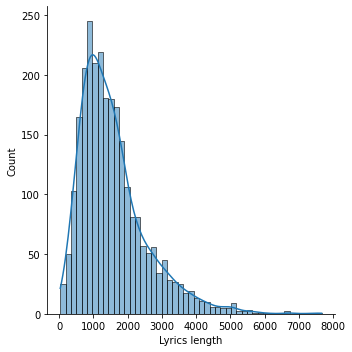

In [7]:
sns.displot(df['lyrics'].str.len(), kde=True)
plt.xlabel('Lyrics length')

Text(0.5, 6.79999999999999, 'Words num')

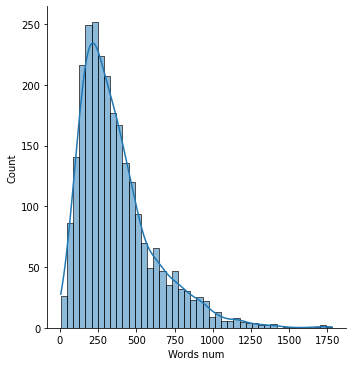

In [30]:
sns.displot(df.apply(lambda x: len(word_tokenize(x['lyrics'])), axis=1), kde=True)
plt.xlabel('Words num')

<AxesSubplot:xlabel='emotion_4Q', ylabel='count'>

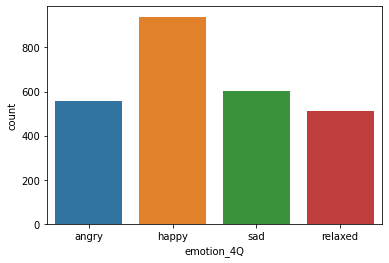

In [8]:
sns.countplot(x="emotion_4Q", data=df, order=['angry', 'happy', 'sad', 'relaxed'])

In [9]:
sorted(df.emotion_4Q.unique())

['angry', 'happy', 'relaxed', 'sad']

<AxesSubplot:xlabel='emotion_2Q', ylabel='count'>

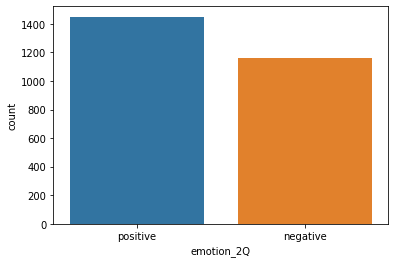

In [10]:
sns.countplot(x="emotion_2Q", data=df)

<AxesSubplot:xlabel='dataset', ylabel='count'>

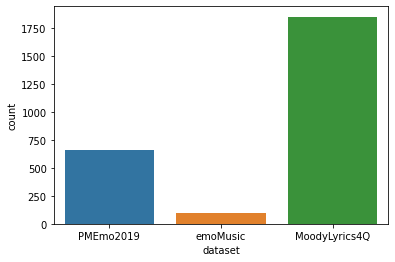

In [11]:
sns.countplot(x="dataset", data=df)

In [12]:
with pd.option_context('display.max_rows', None):
    display(df.genre.value_counts(dropna=False))

NaN                    1084
Pop                     179
Alternative Rock        143
Rock                    117
Hip-Hop                  90
Indie                    87
Thrash Metal             68
Metal                    51
Country                  49
Folk                     43
Electronic               40
Jazz                     38
R&B                      37
Soul                     36
Pop-Rock                 27
Alternative Metal        24
Heavy Metal              24
Industrial Metal         20
Rap Metal                19
Hard Rock                19
Progressive Metal        18
Punk Rock                17
New Wave                 16
House                    15
Psychedelic Rock         15
Progressive Rock         15
New Age                  13
Synthpop                 13
Nu Metal                 13
Blues                    13
Doom Metal               12
Funk                     12
Acoustic                 11
Post-Hardcore            10
Ambient                  10
Symphonic Metal     

In [13]:
with pd.option_context('display.max_rows', None):
    display(df.general_genre.value_counts(dropna=False))

NaN           1118
Rock           464
Pop            345
Metal          300
Hip-Hop        104
Country         95
Electronic      92
Jazz            90
Name: general_genre, dtype: int64

<AxesSubplot:xlabel='general_genre', ylabel='count'>

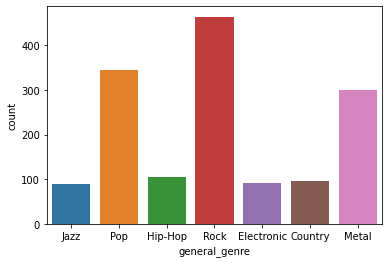

In [14]:
sns.countplot(x="general_genre", data=df)

Text(0, 0.5, 'arousal')

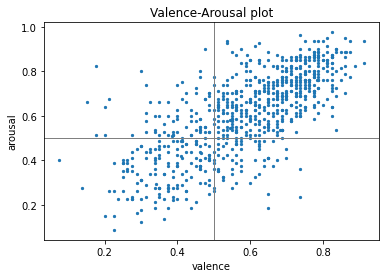

In [15]:
plt.scatter(df.valence_mean.values, df.arousal_mean.values, s=5)
plt.title('Valence-Arousal plot')
plt.axhline(0.5, color='grey', lw=1)
plt.axvline(0.5, color='grey', lw=1)
plt.xlabel('valence')
plt.ylabel('arousal')

In [16]:
train_df = pd.read_csv(os.path.join(dataset_path, 'train_dataset.csv'), index_col=0)
val_df = pd.read_csv(os.path.join(dataset_path, 'val_dataset.csv'), index_col=0)
test_df = pd.read_csv(os.path.join(dataset_path, 'test_dataset.csv'), index_col=0)

<AxesSubplot:xlabel='emotion_4Q', ylabel='count'>

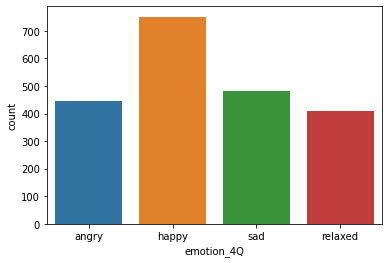

In [17]:
sns.countplot(x="emotion_4Q", data=train_df, order=['angry', 'happy', 'sad', 'relaxed'])

<AxesSubplot:xlabel='emotion_4Q', ylabel='count'>

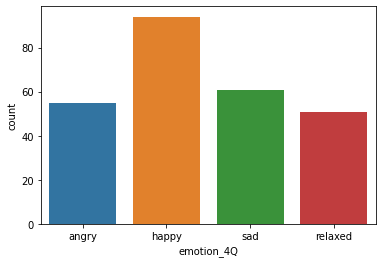

In [18]:
sns.countplot(x="emotion_4Q", data=val_df, order=['angry', 'happy', 'sad', 'relaxed'])

<AxesSubplot:xlabel='emotion_4Q', ylabel='count'>

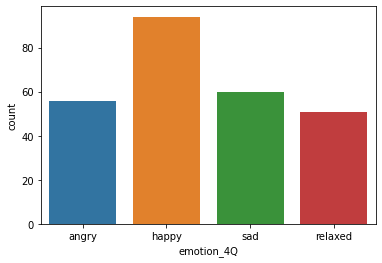

In [19]:
sns.countplot(x="emotion_4Q", data=test_df, order=['angry', 'happy', 'sad', 'relaxed'])